In [2]:
import sleap_io as sio
from behavior_utils import *

In [4]:
root_path = 'D:/clickbait-motivate'

# Get paths to relevant files
slp_paths = get_file_paths(f"{root_path}", 'slp', '', session_type='', print_paths=True, print_n=np.inf)

Found 74 .slp files
0 D:\clickbait-motivate\bonsai\7010\m1\10082025_7010_m1.predictions.slp
1 D:\clickbait-motivate\bonsai\7010\m2\10092025_7010_m2.predictions.slp
2 D:\clickbait-motivate\bonsai\7010\m4\10132025_7010_m4.predictions.slp
3 D:\clickbait-motivate\bonsai\7010\m5\10142025_7010_m5.predictions.slp
4 D:\clickbait-motivate\bonsai\7010\m6\10152025_7010_m6.predictions.slp
5 D:\clickbait-motivate\bonsai\7010\m7\10162025_7010_m7.predictions.slp
6 D:\clickbait-motivate\bonsai\7010\m8\10182025_7010_m8.predictions.slp
7 D:\clickbait-motivate\bonsai\7010\m9\10192025_7010_m9.predictions.slp
8 D:\clickbait-motivate\bonsai\7010\m10\10202025_7010_m10.predictions.slp
9 D:\clickbait-motivate\bonsai\7010\m11\10212025_7010_m11.predictions.slp
10 D:\clickbait-motivate\bonsai\7010\m12\10222025_7010_m12.predictions.slp
11 D:\clickbait-motivate\bonsai\7010\m13\10242025_7010_m13.predictions.slp
12 D:\clickbait-motivate\bonsai\7010\m14\10262025_7010_m14.predictions.slp
13 D:\clickbait-motivate\bonsai

In [53]:
# Make CSV builder function
# get skeleton names, use as headers, populate with points 
print(f"{slp.skeleton}\n")
print(f"{slp.labeled_frames[0].instances[0].points}\n")
print(f"{slp.labeled_frames[0].instances[0].points[1][0][0]}\n")

Skeleton(nodes=["nose", "centroid", "tailbase"], edges=[(0, 1), (1, 2)])

[([         nan,          nan], 0.        , False, False, 'nose')
 ([728.30859375, 339.58654785], 1.05346024,  True, False, 'centroid')
 ([         nan,          nan], 0.        , False, False, 'tailbase')]

728.30859375



In [5]:
for slp_path in slp_paths:
    slp = sio.load_file(f"{slp_path}")

    mouse_id = slp_path.parts[-3]
    session_id = slp_path.parts[-2]

    # Extract node names for df column names
    sleap_cols = []
    for node in slp.skeleton.nodes:
        sleap_cols.append(f"{node.name}_x")
        sleap_cols.append(f"{node.name}_y")

    # Initialize df
    sleap_coords = pd.DataFrame(np.nan, index=range(len(slp.labeled_frames)), columns=sleap_cols)

    # Populate df
    data = {col: [] for col in sleap_cols}

    for frame in slp.labeled_frames:
        for kk, node in enumerate(slp.skeleton.nodes):
            data[f'{node.name}_x'].append(frame.instances[0].points[kk][0][0])
            data[f'{node.name}_y'].append(frame.instances[0].points[kk][0][1])

    sleap_coords_pd = pd.DataFrame(data)

    # Interpolate missing values
    sleap_coords_pd = sleap_coords_pd.interpolate().ffill().bfill()

    # Save csv
    sleap_coords_pd.to_csv(f"{slp_path.parent}/{mouse_id}_{session_id}_slp.csv")

nose_x nose_y centroid_x centroid_y tailbase_x tailbase_y
nose_x nose_y centroid_x centroid_y tailbase_x tailbase_y
nose_x nose_y centroid_x centroid_y tailbase_x tailbase_y
nose_x nose_y centroid_x centroid_y tailbase_x tailbase_y
nose_x nose_y centroid_x centroid_y tailbase_x tailbase_y
nose_x nose_y centroid_x centroid_y tailbase_x tailbase_y
nose_x nose_y centroid_x centroid_y tailbase_x tailbase_y
nose_x nose_y centroid_x centroid_y tailbase_x tailbase_y
nose_x nose_y centroid_x centroid_y tailbase_x tailbase_y
nose_x nose_y centroid_x centroid_y tailbase_x tailbase_y
nose_x nose_y centroid_x centroid_y tailbase_x tailbase_y
nose_x nose_y centroid_x centroid_y tailbase_x tailbase_y
nose_x nose_y centroid_x centroid_y tailbase_x tailbase_y
nose_x nose_y centroid_x centroid_y tailbase_x tailbase_y
nose_x nose_y centroid_x centroid_y tailbase_x tailbase_y
nose_x nose_y centroid_x centroid_y tailbase_x tailbase_y
nose_x nose_y centroid_x centroid_y tailbase_x tailbase_y
nose_x nose_y 

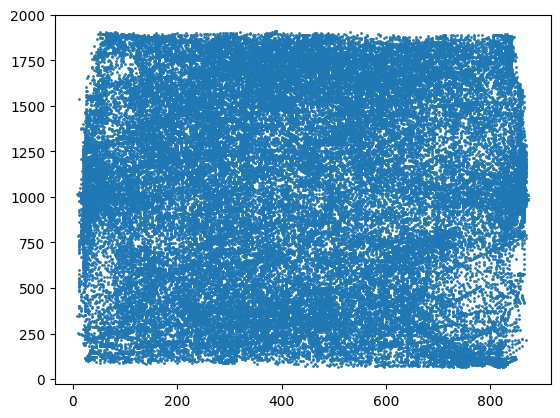

In [11]:
import matplotlib.pyplot as plt
test = pd.read_csv(f"{slp_path.parent}/{mouse_id}_{session_id}_slp.csv")
plt.scatter(test['nose_x'], test['nose_y'], s=1, alpha=1)